# Deep Learning on Graph Data:

In this presentation we use Tensorflow to detect fraudulent graph structures. 

In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import random

In [4]:
# create new session if we need it
sess = tf.Session()

In [120]:
def generate_graphs(n, min_nodes=10, max_nodes=200):
    # Code to generate n random graphs
    
    graphset = []
    
    for i in range(n):

        # Assigning number of nodes randomly between 1-200
        n_nodes = random.randint(min_nodes,max_nodes)
        
        # Modelling the resource allocation with Normal Distrib - mean: m, and stddev = s
        p = 0.1       
        m = 20
        s = 0.25

        '''sess.run(tf.global_variables_initializer())'''
#         G_rand = nx.duplication_divergence_graph(n_nodes, p, 1, directed=True)
#         G_rand = nx.gnr_graph(n_nodes,p)
        G_rand = nx.gnc_graph(n_nodes)
    
        # make sure all nodes have outdegree of at least 1
        outds = G_rand.out_degree().values()
        for i, outd in enumerate(outds):
            if outd == 0:
                valid_inds = range(0,i) +\
                                    range(i+1,n_nodes)
                G_rand.add_edge(i, 
                                random.choice(valid_inds))

        # add tf Pagerank variables to each node - this could be required for Tensorflow optimizations
        '''for node, data in G_rand.nodes_iter(data=True):
            data['PageRank'] = tf.Variable(tf.random_normal([1,1], mean = m, stddev=s))
'''
        graphset.append(G_rand)
    
    return graphset

In [121]:
def displayGraph(graph):
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos)
    nx.draw_networkx_edges(graph, pos, arrows=True)
    nx.draw_networkx_labels(graph,pos)
    plt.title('Graphs generated')
    plt.show()

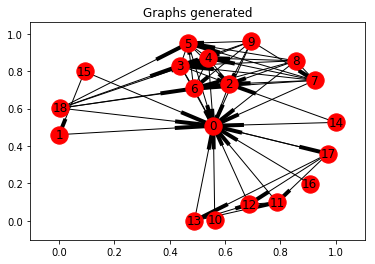

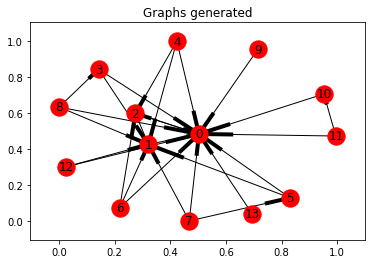

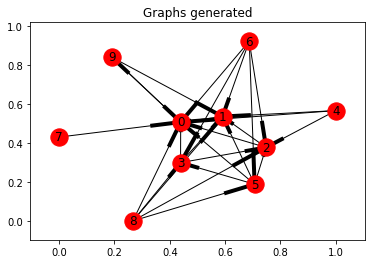

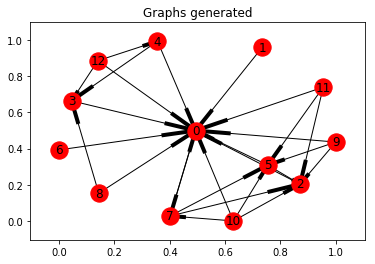

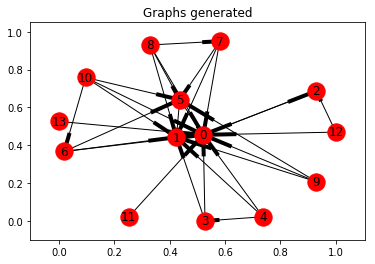

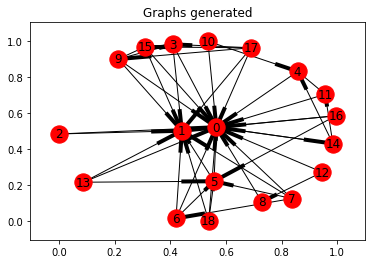

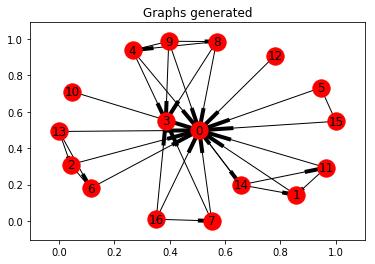

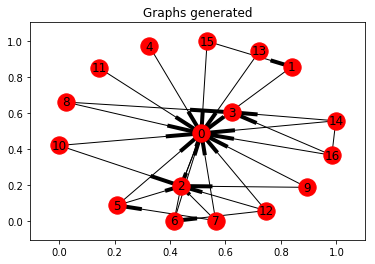

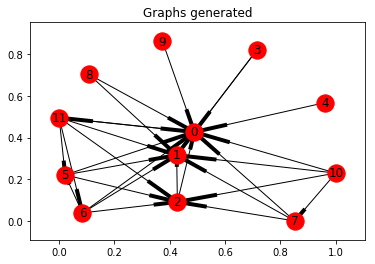

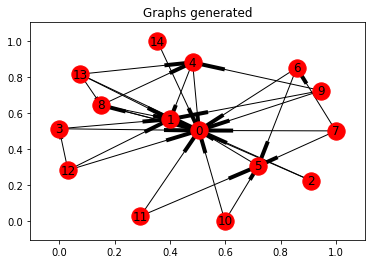

In [122]:
# Generating a set of 30 graphs with varying number of nodes (1-200)

n = 10
graphset = generate_graphs(n, min_nodes=10, max_nodes=20)

# Printing the graphs:
for graph in graphset:
    displayGraph(graph)

In [123]:
def pageRank_allocation(G):
    
    # Calculate PageRank here
    pr = nx.pagerank(G)
    
    # Assign PageRank values here
    for i in G:
        node = G.node[i]
        page_rank_value = pr[i]
        node['PageRank'] = tf.constant(page_rank_value)
        node['pr'] = pr[i]

In [124]:
# After crosschecking for one graph doing for all the graphs
count = 0

for i in range(len(graphset)):
    print 'Allocating Pagerank score for Graph:', i
    pageRank_allocation(graphset[i])

Allocating Pagerank score for Graph: 0
Allocating Pagerank score for Graph: 1
Allocating Pagerank score for Graph: 2
Allocating Pagerank score for Graph: 3
Allocating Pagerank score for Graph: 4
Allocating Pagerank score for Graph: 5
Allocating Pagerank score for Graph: 6
Allocating Pagerank score for Graph: 7
Allocating Pagerank score for Graph: 8
Allocating Pagerank score for Graph: 9


In [125]:
G = graphset[0]

for i in G:
    print i, sess.run(G.node[i]['PageRank'])

0 0.2987
1 0.01125
2 0.0353184
3 0.0224303
4 0.0174782
5 0.014415
6 0.0123205
7 0.00981203
8 0.00789474
9 0.00789474
10 0.00789474
11 0.11617
12 0.0815232
13 0.063525
14 0.00789474
15 0.00789474
16 0.00789474
17 0.261794
18 0.00789474


In [126]:
# At this stage you have a list of Graphs containing random nodes from 1-200
# Each node has a tensorFlow constant value attached to it signifying its PageRank score

# first calc K, A, M
def pagerank(graph, damping=0.85):
    N = nx.number_of_nodes(G)
    A = nx.to_numpy_matrix(graph)
    k = graph.out_degree().values()
    K = np.diag(k)
    print K
    M = (np.matmul(np.linalg.inv(K),A)).T
    R = np.matmul(np.linalg.inv(np.identity(n) - damping*M),\
        (1.0 - damping)/N * np.ones((N,1)))
    print R
    

    
pagerank(graphset[0])

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]


ValueError: operands could not be broadcast together with shapes (10,10) (19,19) 

In [73]:

np.ones((10,1))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])